In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [83]:
bs_counts = [2 ** i for i in range(0, 25)]
files = []

for c in bs_counts:
    os.system(f'dd if=/dev/random bs=128 count={c} > rep_file_{c}')
    files.append(f'rep_file_{c}')

1+0 records in
1+0 records out
128 bytes copied, 2,7053e-05 s, 4,7 MB/s
2+0 records in
2+0 records out
256 bytes copied, 2,5281e-05 s, 10,1 MB/s
4+0 records in
4+0 records out
512 bytes copied, 3,2511e-05 s, 15,7 MB/s
8+0 records in
8+0 records out
1024 bytes (1,0 kB, 1,0 KiB) copied, 3,4715e-05 s, 29,5 MB/s
16+0 records in
16+0 records out
2048 bytes (2,0 kB, 2,0 KiB) copied, 4,7677e-05 s, 43,0 MB/s
32+0 records in
32+0 records out
4096 bytes (4,1 kB, 4,0 KiB) copied, 8,0572e-05 s, 50,8 MB/s
64+0 records in
64+0 records out
8192 bytes (8,2 kB, 8,0 KiB) copied, 0,000145399 s, 56,3 MB/s
128+0 records in
128+0 records out
16384 bytes (16 kB, 16 KiB) copied, 0,000269053 s, 60,9 MB/s
256+0 records in
256+0 records out
32768 bytes (33 kB, 32 KiB) copied, 0,000530349 s, 61,8 MB/s
512+0 records in
512+0 records out
65536 bytes (66 kB, 64 KiB) copied, 0,000964899 s, 67,9 MB/s
1024+0 records in
1024+0 records out
131072 bytes (131 kB, 128 KiB) copied, 0,00191566 s, 68,4 MB/s
2048+0 records in
2

In [84]:
path = '../cmake-build-debug/file_reading_analysis'
def run(type, size, batch):
    os.system(f'{path} -m {type} -b {batch} -i rep_file_{size} -o report.csv -v -r 4')

In [85]:
batches = [0, 128, 1024, 4096, 16384, 65536, 131072, 2097152]

for m in ['read', 'ifstream']:
    for f in files:
        for b in batches:
            os.system(f'{path} -m {m} -b {b} -i {f} -o report_batches.csv -r 10')
        print(f'{f} for {m} done')


rep_file_1 for read done
rep_file_2 for read done
rep_file_4 for read done
rep_file_8 for read done
rep_file_16 for read done
rep_file_32 for read done
rep_file_64 for read done
rep_file_128 for read done
rep_file_256 for read done
rep_file_512 for read done
rep_file_1024 for read done
rep_file_2048 for read done
rep_file_4096 for read done
rep_file_8192 for read done
rep_file_16384 for read done
rep_file_32768 for read done
rep_file_65536 for read done
rep_file_131072 for read done
rep_file_262144 for read done
rep_file_524288 for read done
rep_file_1048576 for read done
rep_file_2097152 for read done
rep_file_4194304 for read done
rep_file_8388608 for read done
rep_file_16777216 for read done
rep_file_1 for ifstream done
rep_file_2 for ifstream done
rep_file_4 for ifstream done
rep_file_8 for ifstream done
rep_file_16 for ifstream done
rep_file_32 for ifstream done
rep_file_64 for ifstream done
rep_file_128 for ifstream done
rep_file_256 for ifstream done
rep_file_512 for ifstream do

In [105]:
df_batches = pd.read_csv('report_batches.csv')
df_batches

,method,duration,size,batch
0,read,15.936,128,128
1,read,5.352,128,128
2,read,3.777,128,128
3,read,3.482,128,128
4,read,3.275,128,128
...,...,...,...,...
8229,ifstream,6855400.000,2147483648,2097152
8230,ifstream,6853560.000,2147483648,2097152
8231,ifstream,6970080.000,2147483648,2097152
8232,ifstream,6863950.000,2147483648,2097152


In [106]:
maxs = df_batches.groupby('size')['duration'].transform('max')
df_batches = df_batches[~(df_batches['duration'] == maxs)]
df_batches['size'].unique()

array([       128,        256,        512,       1024,       2048,
             4096,       8192,      16384,      32768,      65536,
           131072,     262144,     524288,    1048576,    2097152,
          4194304,    8388608,   16777216,   33554432,   67108864,
        134217728,  268435456,  536870912, 1073741824, 2147483648])

In [128]:
def draw_time_vs_batches(s=128):
    act_df = df_batches[df_batches['batch'] <= s]
    act_df = act_df[act_df['size'] == s]
    ax = act_df[act_df['method'] == 'read'].groupby('batch').mean().plot(y='duration', figsize=(15,15), fontsize=16, lw=4)
    ax = act_df[act_df['method'] == 'ifstream'].groupby('batch').mean().plot(y='duration', ax=ax, figsize=(15,15), fontsize=16, lw=4)
    ax.legend(['read', 'ifstream'], fontsize=20)
    ax.set_ylabel('Time, ms', fontdict={'fontsize':24})
    ax.set_xlabel('Batch, b', fontdict={'fontsize':24})
    ax.set_title(f'Batches experiment, size = {s}', fontdict={'fontsize':24})
    ax.get_figure().savefig(f'Batches experiment, size = {s}.png')

def draw_time_vs_sizes(m, b=[128]):
    ax = None
    ax = df_batches[df_batches['batch'] == b[0]][df_batches['method'] == m].groupby('size').mean().plot(y='duration', figsize=(15,15), fontsize=16, lw=4)
    for b_ in b[1:]:
        ax = df_batches[df_batches['batch'] == b_][df_batches['method'] == m].groupby('size').mean().plot(y='duration', figsize=(15,15), fontsize=16, lw=4, ax=ax)
    ax.legend([f'batch = {b_}' for b_ in b], fontsize=20)
    ax.set_ylabel('Time, ms', fontdict={'fontsize':24})
    ax.set_xlabel('Size, b', fontdict={'fontsize':24})
    ax.set_title(f'Batches experiment, method = {m}', fontdict={'fontsize':24})
    ax.get_figure().savefig(f'Batches experiment, method = {m}.png')

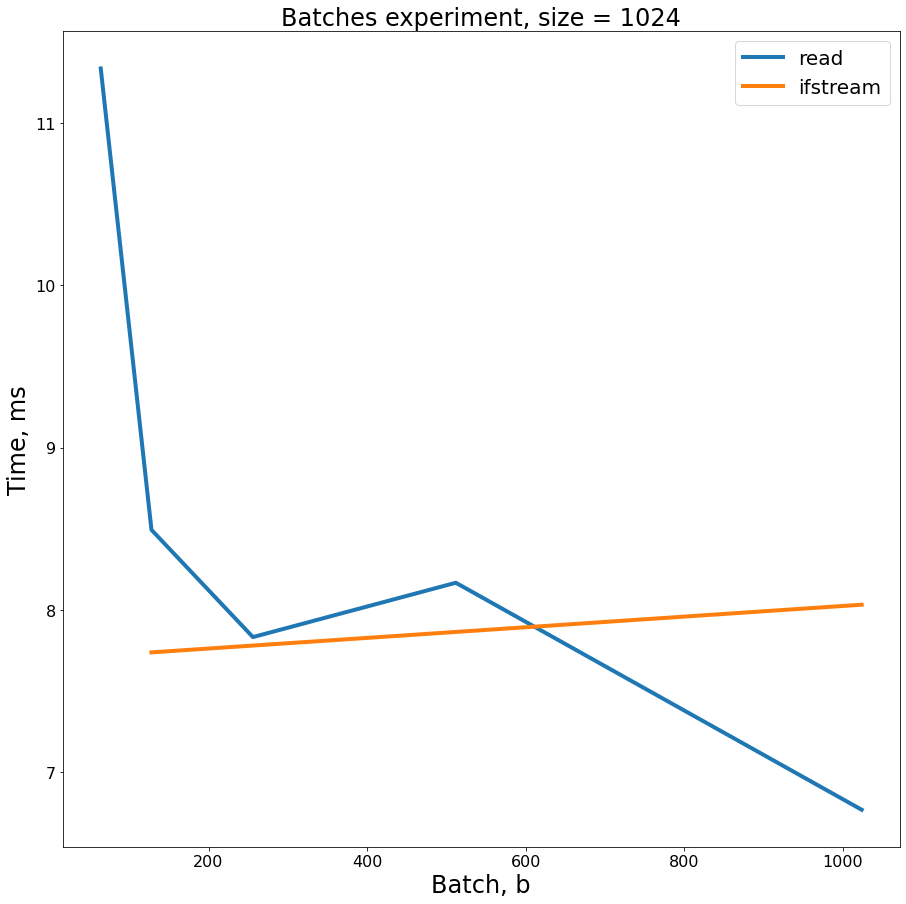

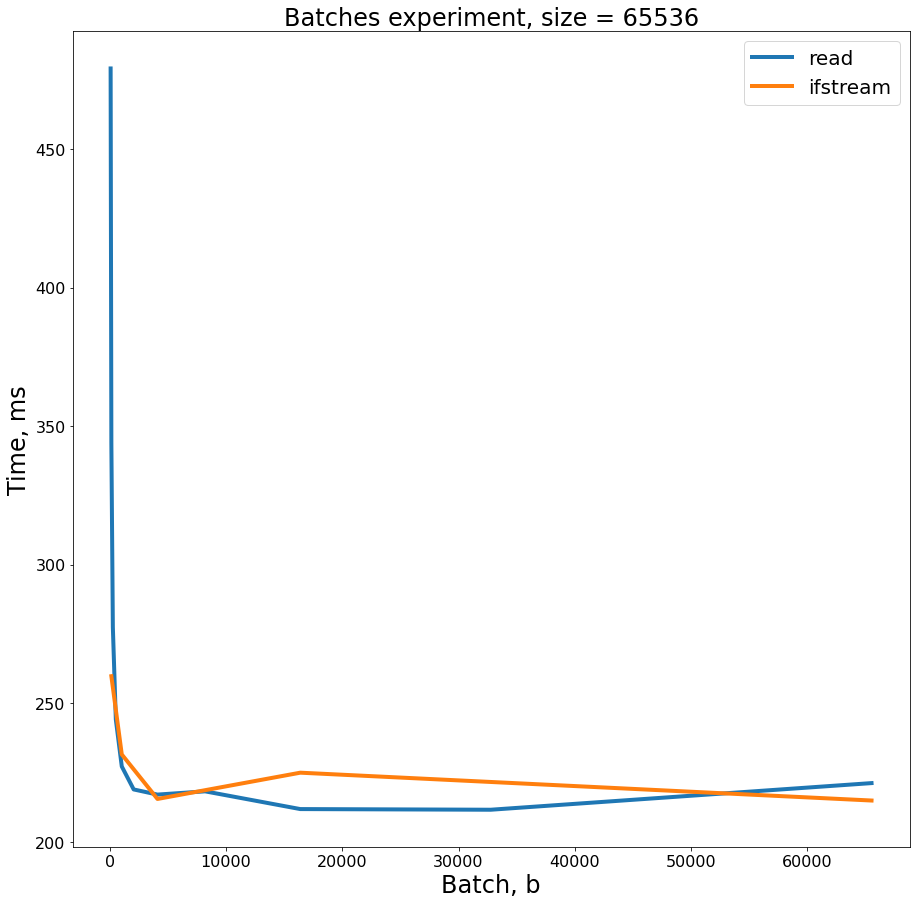

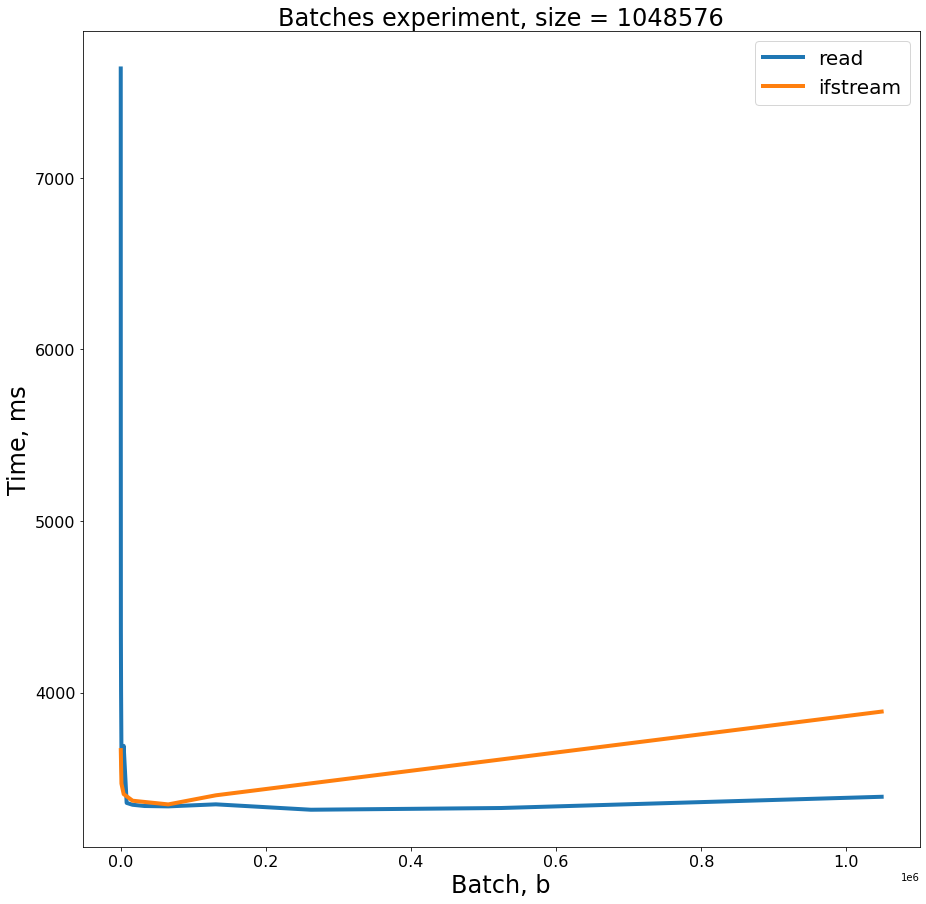

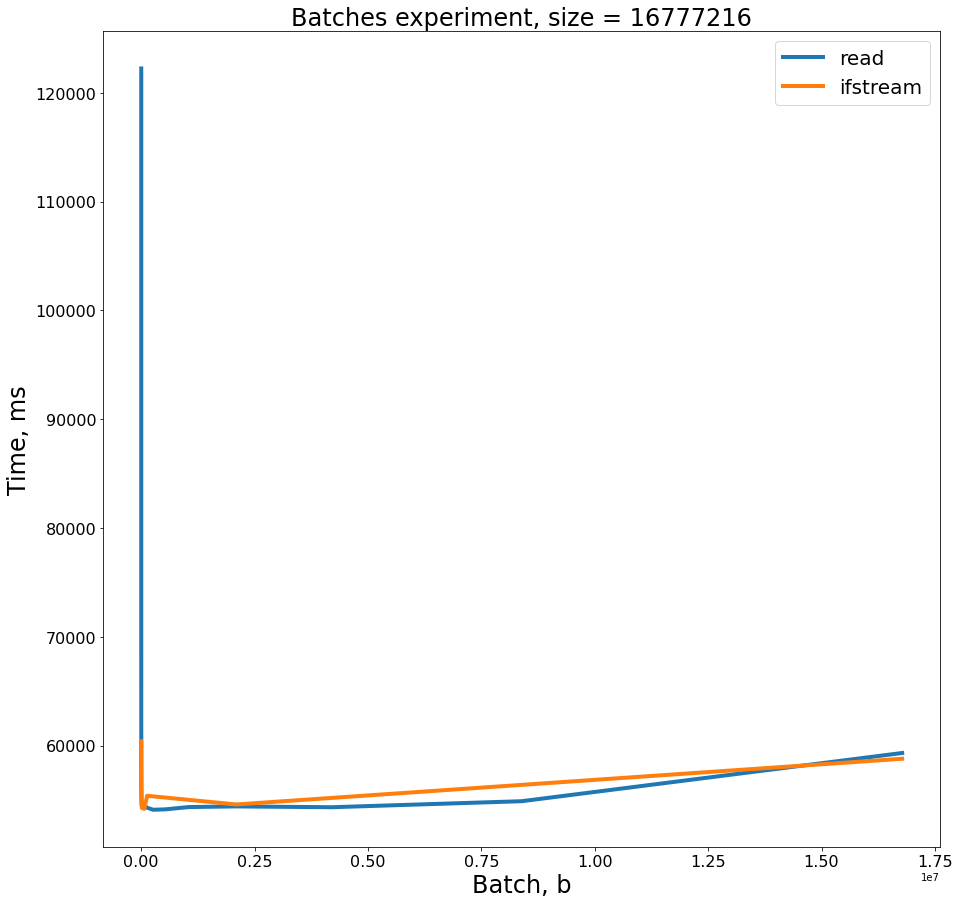

In [129]:
draw_time_vs_batches(1024)
draw_time_vs_batches(65536)
draw_time_vs_batches(1048576)
draw_time_vs_batches(16777216)

/tmp/ipykernel_69359/2801348499.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax = df_batches[df_batches['batch'] == b[0]][df_batches['method'] == m].groupby('size').mean().plot(y='duration', figsize=(15,15), fontsize=16, lw=4)
/tmp/ipykernel_69359/2801348499.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax = df_batches[df_batches['batch'] == b_][df_batches['method'] == m].groupby('size').mean().plot(y='duration', figsize=(15,15), fontsize=16, lw=4, ax=ax)
/tmp/ipykernel_69359/2801348499.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax = df_batches[df_batches['batch'] == b_][df_batches['method'] == m].groupby('size').mean().plot(y='duration', figsize=(15,15), fontsize=16, lw=4, ax=ax)
/tmp/ipykernel_69359/2801348499.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax = df_batches[df_batches['batch'] == b_][df_batches['method'] == m].gr

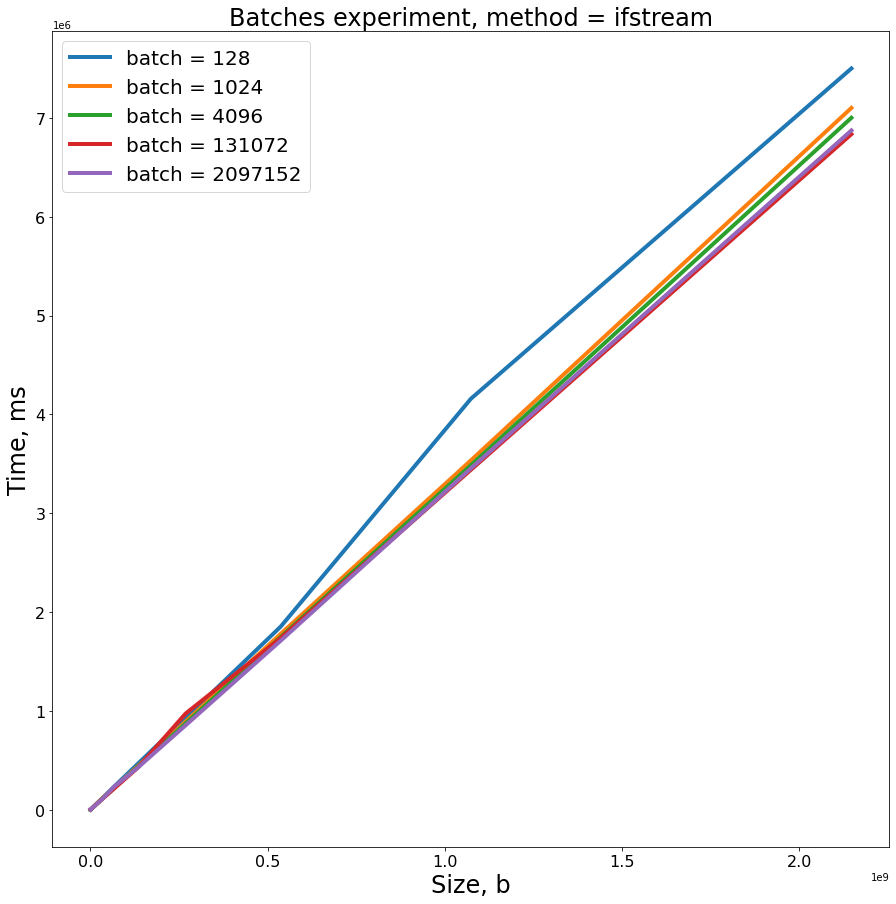

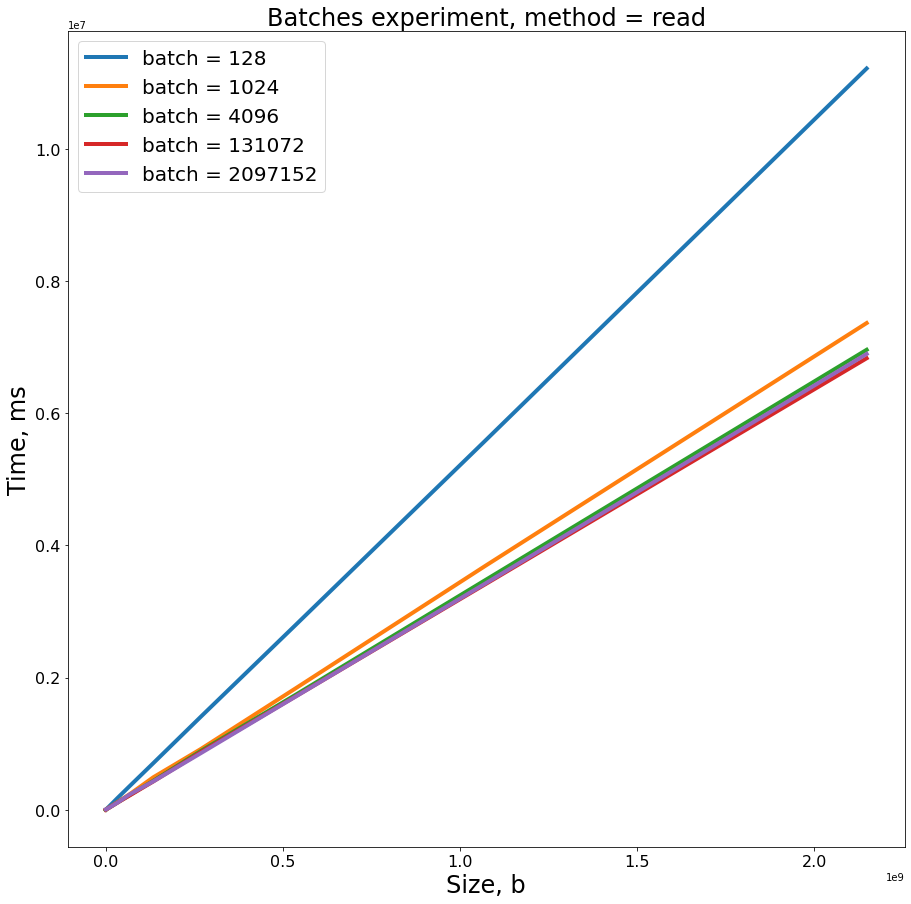

In [130]:
draw_time_vs_sizes('ifstream', [128, 1024, 4096, 131072, 2097152])
draw_time_vs_sizes('read', [128, 1024, 4096, 131072, 2097152])

In [131]:
for f in files:
    os.system(f'{path} -m mmap -i {f} -o report_mmap.csv -r 10')
    print(f'{f} done')


rep_file_1 done
rep_file_2 done
rep_file_4 done
rep_file_8 done
rep_file_16 done
rep_file_32 done
rep_file_64 done
rep_file_128 done
rep_file_256 done
rep_file_512 done
rep_file_1024 done
rep_file_2048 done
rep_file_4096 done
rep_file_8192 done
rep_file_16384 done
rep_file_32768 done
rep_file_65536 done
rep_file_131072 done
rep_file_262144 done
rep_file_524288 done
rep_file_1048576 done
rep_file_2097152 done
rep_file_4194304 done
rep_file_8388608 done
rep_file_16777216 done


In [136]:
df = pd.read_csv('report_mmap.csv')
df

,method,duration,size,batch
0,mmap,11.513,128,-1
1,mmap,8.025,128,-1
2,mmap,5.015,128,-1
3,mmap,4.809,128,-1
4,mmap,4.350,128,-1
...,...,...,...,...
245,mmap,6766840.000,2147483648,-1
246,mmap,6805100.000,2147483648,-1
247,mmap,6818480.000,2147483648,-1
248,mmap,6788620.000,2147483648,-1


In [137]:
maxs = df.groupby('size')['duration'].transform('max')
df = df[~(df['duration'] == maxs)]
df

,method,duration,size,batch
1,mmap,8.025,128,-1
2,mmap,5.015,128,-1
3,mmap,4.809,128,-1
4,mmap,4.350,128,-1
5,mmap,4.263,128,-1
...,...,...,...,...
245,mmap,6766840.000,2147483648,-1
246,mmap,6805100.000,2147483648,-1
247,mmap,6818480.000,2147483648,-1
248,mmap,6788620.000,2147483648,-1


In [138]:
df_fastest_ri = df_batches[df_batches['batch'] == 131072]
df_fastest_read = df_fastest_ri[df_fastest_ri['method'] == 'read']
df_fastest_ifstream = df_fastest_ri[df_fastest_ri['method'] == 'ifstream']

df_fastest_ifstream['size'] /= 1024 * 1024
df_fastest_read['size'] /= 1024 * 1024
df['size'] /= 1024 * 1024

df_fastest_ifstream['duration'] /= 1000000
df_fastest_read['duration'] /= 1000000
df['duration'] /= 1000000

/tmp/ipykernel_69359/2459665693.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fastest_ifstream['size'] /= 1024 * 1024
/tmp/ipykernel_69359/2459665693.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fastest_read['size'] /= 1024 * 1024
/tmp/ipykernel_69359/2459665693.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

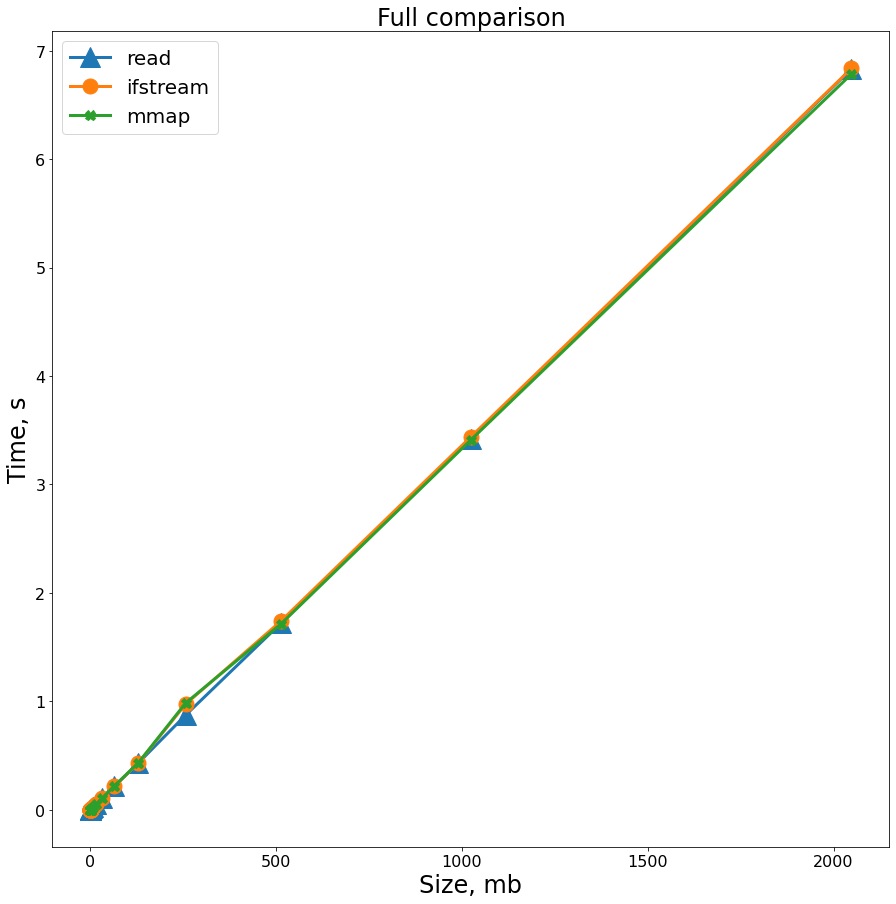

In [140]:
ax2 = df_fastest_read.groupby('size').mean().plot(y='duration', figsize=(15,15), fontsize=16, lw=3, style=['-^'], markersize=20)
ax2 = df_fastest_ifstream.groupby('size').mean().plot(y='duration', figsize=(15,15), fontsize=16, lw=3, ax=ax2, style=['-o'], markersize=15)
ax2 = df.groupby('size').mean().plot(y='duration', figsize=(15,15), fontsize=16, lw=3, ax=ax2, style=['-X'], markersize=10)

ax2.legend(['read', 'ifstream', 'mmap'], fontsize=20)
ax2.set_ylabel('Time, s', fontdict={'fontsize':24})
ax2.set_xlabel('Size, mb', fontdict={'fontsize':24})
ax2.set_title(f'Full comparison', fontdict={'fontsize':24})
ax2.get_figure().savefig('full.png')

In [145]:
import time_measure
df = time_measure.get_data()

In [148]:
df = df.groupby(['size', 'method']).mean()
df.to_csv('kernel_time.csv')

,method,batch_size,size,iterations,kernel_time
0,mmap,131072,128,1,0.000
1,mmap,131072,256,1,0.000
2,mmap,131072,512,1,0.000
3,mmap,131072,1024,1,0.000
4,mmap,131072,2048,1,0.002
...,...,...,...,...,...
70,read,131072,134217728,1,0.016
71,read,131072,268435456,1,0.056
72,read,131072,536870912,1,0.048
73,read,131072,1073741824,1,0.121
